# DataSet_Collection

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("upi_transactions_2024.csv")

In [5]:
data.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,08-10-2024 15:17,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,11-04-2024 06:56,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,02-04-2024 13:27,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,07-01-2024 10:09,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,23-01-2024 19:04,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


# Frequency Of Users Using Online Transactions With Specific Amount

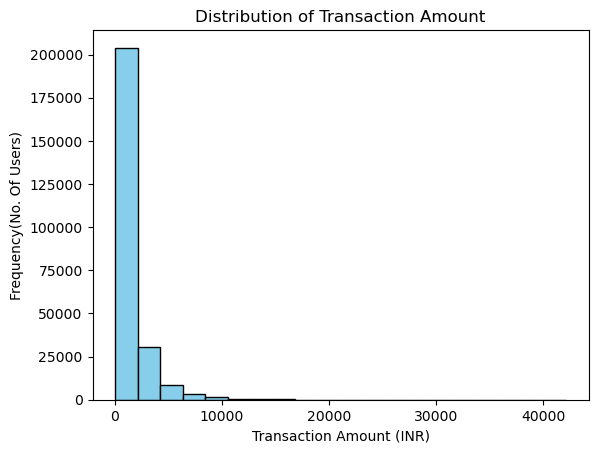

In [12]:
plt.figure()
plt.hist(data["amount (INR)"],bins=20,color="skyblue",edgecolor="black")
plt.xlabel("Transaction Amount (INR)")
plt.ylabel("Frequency(No. Of Users)")
plt.title("Distribution of Transaction Amount")
plt.show()

# Outlier Detection

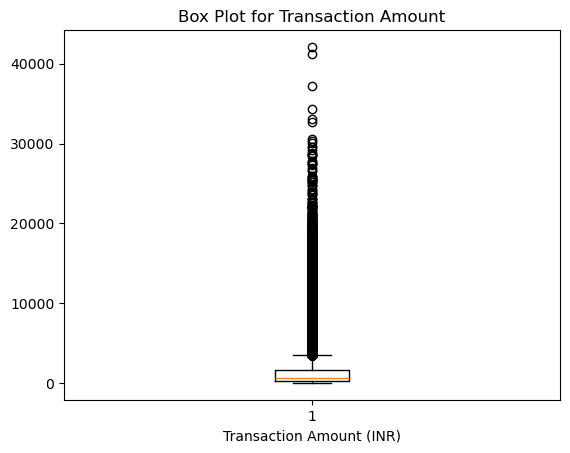

In [14]:
plt.figure()
plt.boxplot(data["amount (INR)"])
plt.xlabel("Transaction Amount (INR)")
plt.title("Box Plot for Transaction Amount")
plt.show()

# fraud VS non-fraud detection 

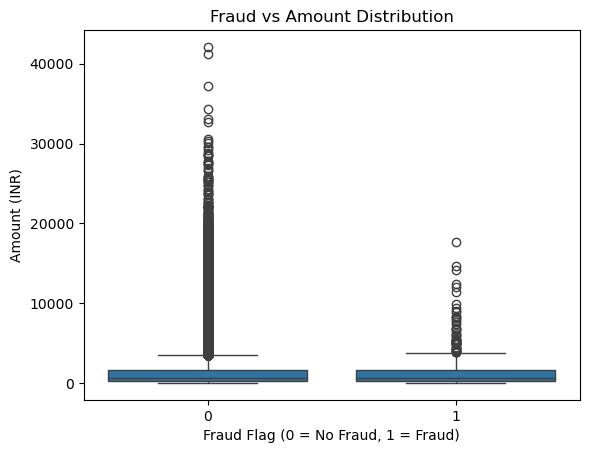

In [19]:
plt.figure()
sns.boxplot(data=data, x="fraud_flag", y="amount (INR)")
plt.xlabel("Fraud Flag (0 = No Fraud, 1 = Fraud)")
plt.ylabel("Amount (INR)")
plt.title("Fraud vs Amount Distribution")
plt.show()


# Transaction by hours

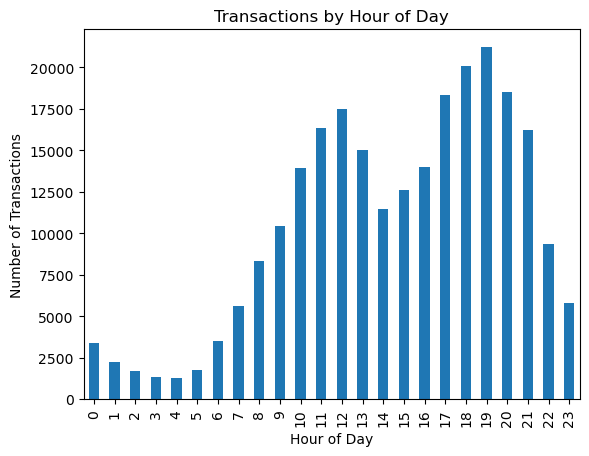

In [21]:
plt.figure()
data['hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Hour of Day")
plt.show()

# Fraud Probability by Hour (High-Value Plot)

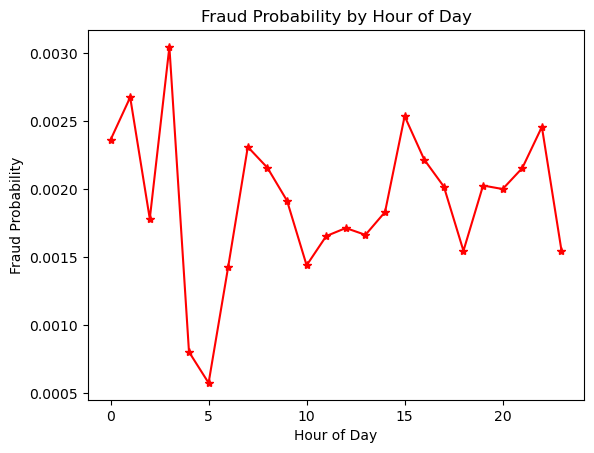

In [28]:
fraud_by_hour = data.groupby('hour_of_day')['fraud_flag'].mean()

plt.figure()
fraud_by_hour.plot(kind='line', marker='*', color='r')
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability by Hour of Day")
plt.show()

# Weekend vs Weekday Fraud Analysis

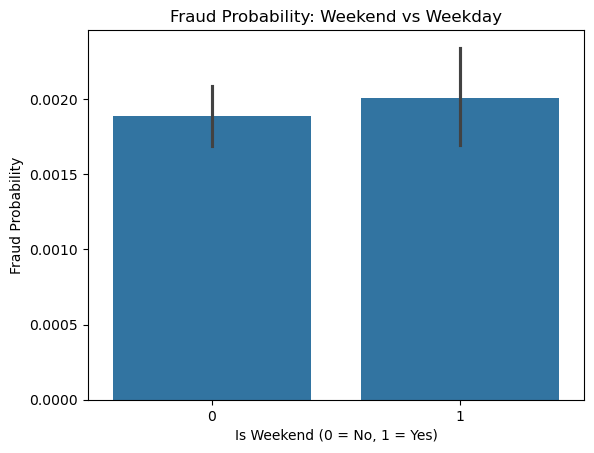

In [32]:
plt.figure()
sns.barplot(x='is_weekend', y='fraud_flag', data=data)
plt.xlabel("Is Weekend (0 = No, 1 = Yes)")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability: Weekend vs Weekday")
plt.show()

# Fraud by Transaction Type (P2P vs P2M)

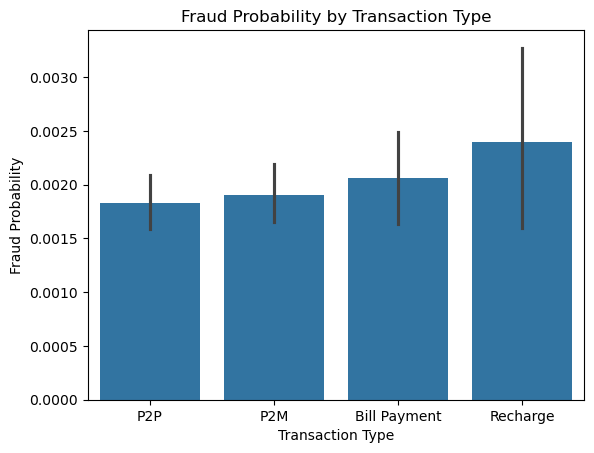

In [33]:
plt.figure()
sns.barplot(x='transaction type', y='fraud_flag', data=data)
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability by Transaction Type")
plt.show()

# Fraud by Merchant Category (High Impact)

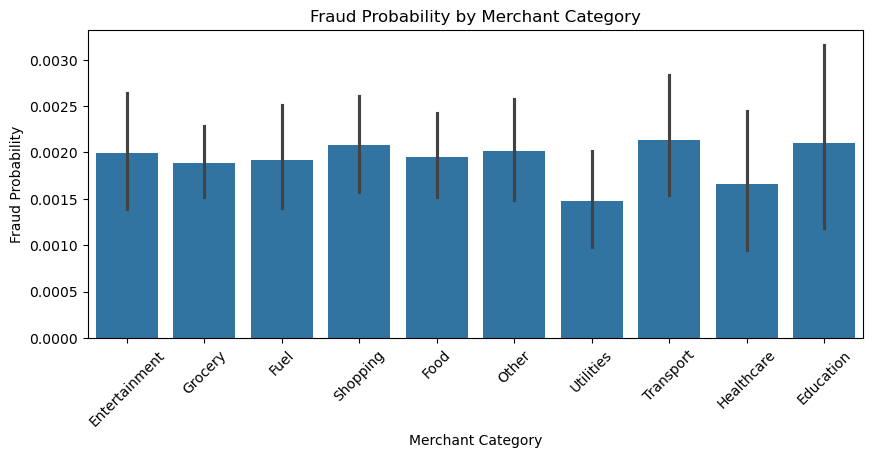

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(x='merchant_category', y='fraud_flag', data=data)
plt.xticks(rotation=45)
plt.xlabel("Merchant Category")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability by Merchant Category")
plt.show()

#  Device Type vs Fraud

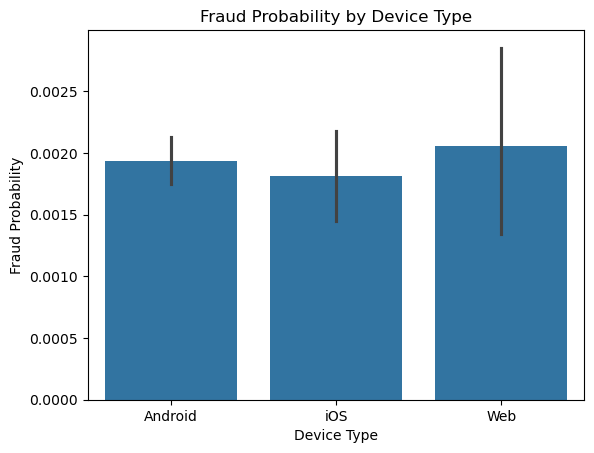

In [35]:
plt.figure()
sns.barplot(x='device_type', y='fraud_flag', data=data)
plt.xlabel("Device Type")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability by Device Type")
plt.show()

# Network Type vs Fraud

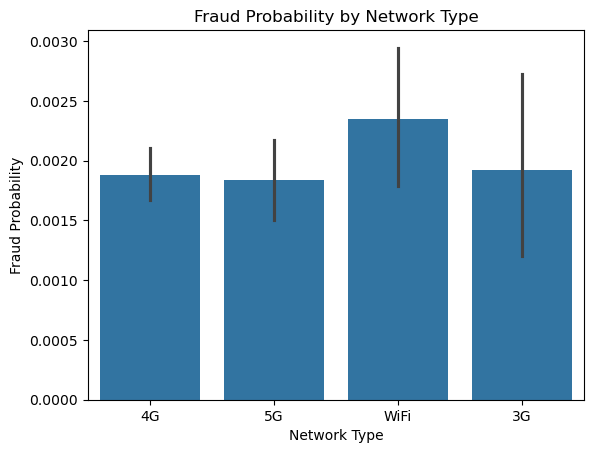

In [36]:
plt.figure()
sns.barplot(x='network_type', y='fraud_flag', data=data)
plt.xlabel("Network Type")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability by Network Type")
plt.show()

# Day of Week vs Fraud

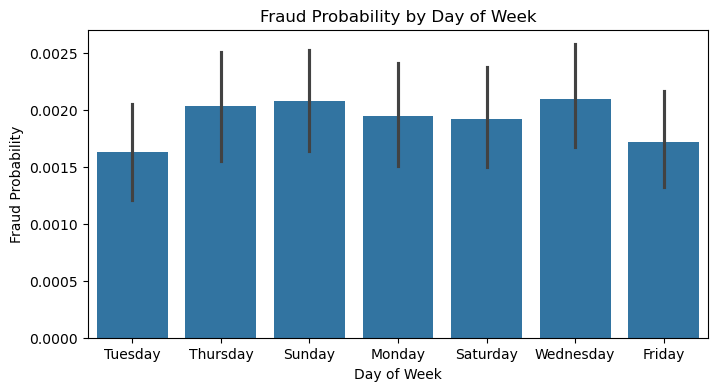

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(x='day_of_week', y='fraud_flag', data=data)
plt.xlabel("Day of Week")
plt.ylabel("Fraud Probability")
plt.title("Fraud Probability by Day of Week")
plt.show()

# Correlation Heatmap 

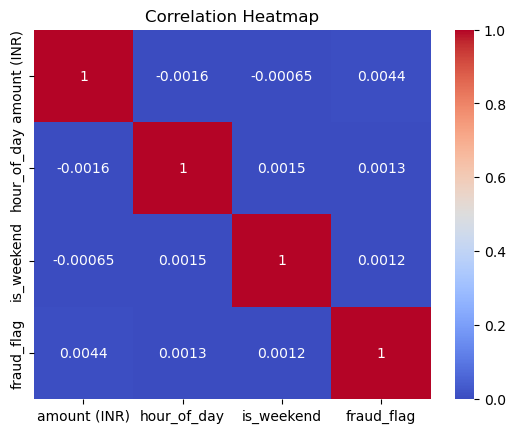

In [40]:
numeric_cols = ['amount (INR)', 'hour_of_day', 'is_weekend', 'fraud_flag']

plt.figure()
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Fraud Percentage Pie Chart

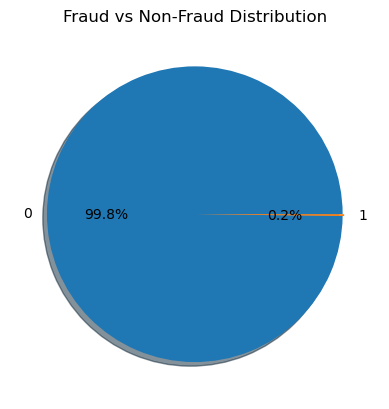

In [50]:
plt.figure()
data['fraud_flag'].value_counts().plot(kind='pie', autopct='%2.1f%%',explode=[0,0.01],shadow=True)
plt.title("Fraud vs Non-Fraud Distribution")
plt.ylabel("")
wedgeprops={
    "edgecolor": "black"}
plt.show()

# 1. Mean, Median, Mode

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
data = pd.read_csv("upi_transactions_2024.csv")

In [5]:

# Mean
mean_amount = data['amount (INR)'].mean()

# Median
median_amount = data['amount (INR)'].median()

# Mode
mode_amount = data['amount (INR)'].mode()[0]

print("Mean:", mean_amount)
print("Median:", median_amount)
print("Mode:", mode_amount)

Mean: 1311.756036
Median: 629.0
Mode: 215


# 2. Variance & Standard Deviation

In [7]:
# Variance
variance_amount = data['amount (INR)'].var()

# Standard Deviation
std_amount = data['amount (INR)'].std()

print("Variance:", variance_amount)
print("Standard Deviation:", std_amount)

Variance: 3415322.896505094
Standard Deviation: 1848.0592242958812


# 3. Probability Distribution

In [8]:
# Probability of fraud
prob_fraud = data['fraud_flag'].mean()

print("Probability of Fraud:", prob_fraud)


Probability of Fraud: 0.00192


# 4. Conditional Probability

In [13]:
threshold = 2000

high_amount = data[data['amount (INR)'] > threshold]
conditional_prob = high_amount['fraud_flag'].mean()

print("P(Fraud | Amount > 2000):", conditional_prob)



P(Fraud | Amount > 2000): 0.0020750686603600854


# 5. Correlation

In [14]:
# Select numeric columns
numeric_cols = ['amount (INR)', 'hour_of_day', 'is_weekend', 'fraud_flag']

correlation_matrix = data[numeric_cols].corr()

print(correlation_matrix)


              amount (INR)  hour_of_day  is_weekend  fraud_flag
amount (INR)      1.000000    -0.001604   -0.000653    0.004449
hour_of_day      -0.001604     1.000000    0.001496    0.001323
is_weekend       -0.000653     0.001496    1.000000    0.001221
fraud_flag        0.004449     0.001323    0.001221    1.000000


# 6. Curve Fitting (Growth Trend)

In [19]:
data['timestamp'] = pd.to_datetime(
    data['timestamp'], 
    format="%d-%m-%Y %H:%M"
)


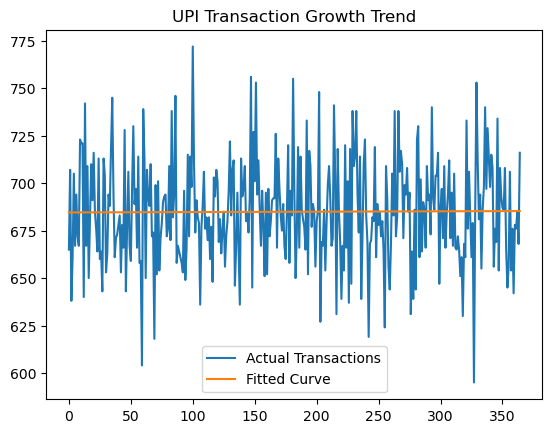

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Transactions per day
daily_txn = data.groupby(data['timestamp'].dt.date).size()

# Curve fitting (linear)
x = np.arange(len(daily_txn))
y = daily_txn.values

coeff = np.polyfit(x, y, 1)
trend = np.poly1d(coeff)

plt.plot(y, label="Actual Transactions")
plt.plot(trend(x), label="Fitted Curve")
plt.legend()
plt.title("UPI Transaction Growth Trend")
plt.show()
